# Integrator comparisons

Yuri Shimane, 2024.03.08

In [3]:
using Pkg
Pkg.status()

Project FullEphemerisPropagator v0.1.0
Status `~/Documents/codes/dev-jl/FullEphemerisPropagator.jl/Project.toml`
⌃ [0c46a032] DifferentialEquations v7.12.0
⌃ [e9467ef8] GLMakie v0.9.8
  [7073ff75] IJulia v1.24.2
  [5bab7191] SPICE v0.2.3
  [d1185830] SymbolicUtils v1.5.0
⌃ [0c5d862f] Symbolics v5.16.1
  [37e2e46d] LinearAlgebra
  [de0858da] Printf
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [5]:
using GLMakie
using SPICE
using OrdinaryDiffEq

In [79]:
include(joinpath(@__DIR__, "../src/FullEphemerisPropagator.jl"))

Main.FullEphemerisPropagator

In [80]:
# furnish spice kernels
spice_dir = ENV["SPICE"]

# get spice kernels
furnsh(joinpath(spice_dir, "lsk", "naif0012.tls"))
furnsh(joinpath(spice_dir, "spk", "de440.bsp"))

# define parameters
mus = [
    4.9028000661637961E+03,
    3.9860043543609598E+05,
    1.3271244004193938E+11,
]
naif_ids = ["301", "399", "10"]
naif_frame = "J2000"
abcorr = "NONE"
lstar = 3000.0

3000.0

In [81]:
et0 = 946728069.3271508
state0 = [-0.03344377115230989, 5.7624151996473545, -22.743438743043676, 
          -0.046526421787245704, 0.029709480647552224, 0.004309142532513644]

6-element Vector{Float64}:
  -0.03344377115230989
   5.7624151996473545
 -22.743438743043676
  -0.046526421787245704
   0.029709480647552224
   0.004309142532513644

In [89]:
# instantiate propagator
prop = FullEphemerisPropagator.Propagator(
    Vern8(),
    lstar,
    mus,
    naif_ids;
    use_srp = true,
    naif_frame = naif_frame,
    reltol = 1e-12,
    abstol = 1e-12,
);

In [90]:
# solve
tspan = (0.0, FullEphemerisPropagator.sec2TU(prop, 5 * 6.55 * 86400))
sol = FullEphemerisPropagator.propagate(prop, et0, tspan, state0)
@show sol.u[end];

sol.u[end] = [-4.255315013268986, 2.027223572430317, -26.56736976151936, 0.06908323053922084, -0.044325212815211186, -0.045214817120739104]


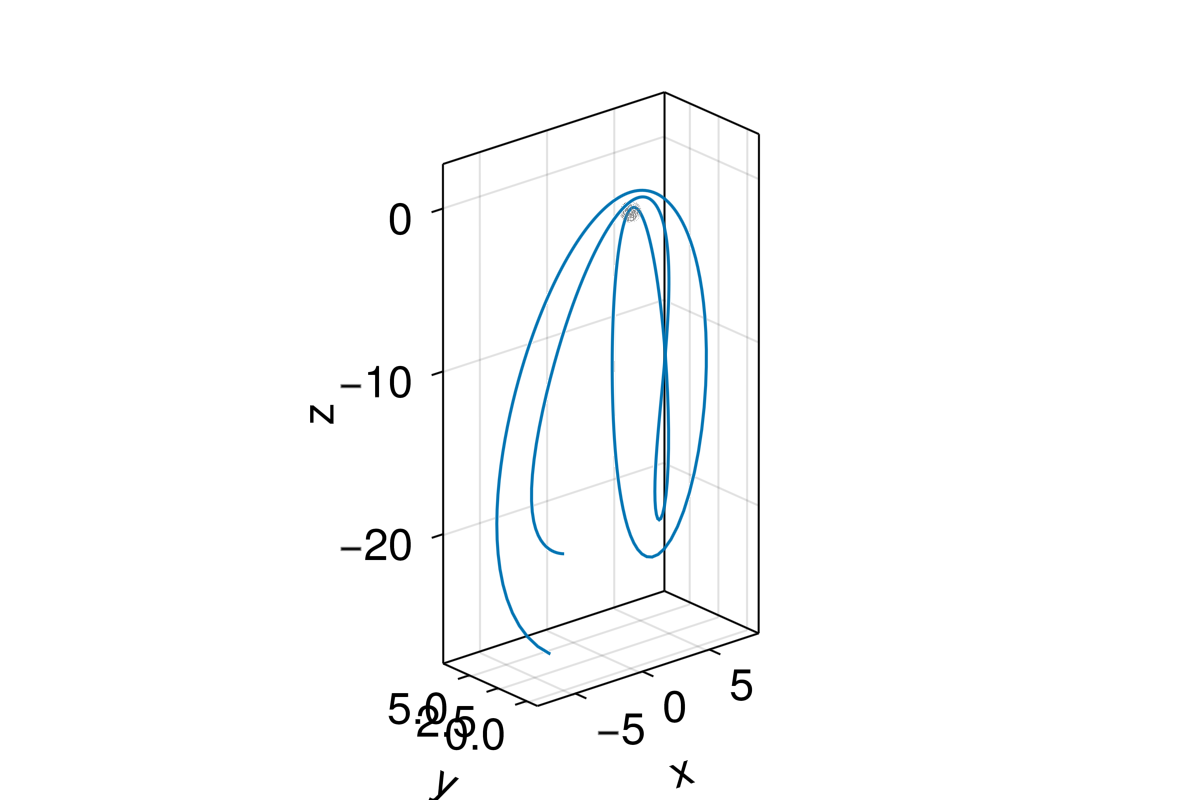

In [91]:
# plot with GLMakie
fig = Figure(size=(600,400), fontsize=22)
ax1 = Axis3(fig[1, 1], aspect=:data)
lines!(ax1, sol[1,:], sol[2,:], sol[3,:])

# Generate points on the sphere
nsph = 30
θ = range(0, stop=2π, length=nsph)
ϕ = range(0, stop=π, length=nsph)
R = 1737.4/lstar
center = [0, 0, 0]
xsphere = [center[1] + R * cos(θ[i]) * sin(ϕ[j]) for j in 1:nsph, i in 1:nsph]
ysphere = [center[2] + R * sin(θ[i]) * sin(ϕ[j]) for j in 1:nsph, i in 1:nsph]
zsphere = [center[3] + R * cos(ϕ[j]) for j in 1:nsph, i in 1:nsph]
wireframe!(ax1, xsphere, ysphere, zsphere, color=:grey, linewidth=0.5)
fig

In [92]:
naif_ids[3] == "10"

true